In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sps

# Распределение Пуассона
## Выборочное среднее и выборочная дисперсия

In [2]:
def PoissonDistribution(mu, x):
    '''
    This fuction returns an array of Poisson destribution in the points of "x" array.
    mu - is a paramter > 0
    x - array of real numbers (optional: np.array(..., dtype=float32))
    '''

    X = np.zeros_like(x)
    for i in range(X.shape[0]):
        X[i] = (mu**x[i])/np.math.factorial(int(x[i]))*np.exp(-mu)
    return X

def random_poisson(mu, size=1):
    '''
    This fuction generates an array of random points which are distributed as Poisson.
    mu - is a parameter of shape.
    '''
    poisson_array = np.zeros(size, dtype='f8')
    for k in range(size):
        a = np.exp(-mu)
        b = 1
        i = 0
        u = np.random.uniform(0. , 1.)
        b = b*u
        while b>=a:
            u = np.random.uniform(0., 1.)
            b = b*u
            i+=1
        poisson_array[k] = i
        
    return poisson_array

def sample_mean(variables):
    n = variables.shape[0]
    s = np.sum(variables)
    s_m = s/n
    return s_m

def sample_variance(variables, samp_mean):
    n = variables.shape[0]
    variables = (variables - samp_mean)**2
    s = np.sum(variables)
    s_v = s/n
    return s_v

In [3]:
np.random.seed(12345678) # пусть, по умолчанию стартовое значение генератора равно 12345678
poisson_data_5 = random_poisson(2, 5)
print(poisson_data_5)
poisson_data_10 = random_poisson(2, 10)
print(poisson_data_10)

[2. 1. 1. 3. 0.]
[2. 1. 2. 3. 7. 2. 3. 1. 2. 0.]


In [4]:
# найдем выборочное среднее и выборочную дисперсию для двух выборок (самостоятельно)
print('С помощью двух функций (lambda=2):')
print('Выборочное среднее для выборки {} = {}'.format(poisson_data_5, sample_mean(poisson_data_5)))
print('Выборочное среднее для выборки {} = {}'.format(poisson_data_10, sample_mean(poisson_data_10)))
print('Выборочная дисперсия для выборки {} = {}'.format(poisson_data_5, sample_variance(poisson_data_5, sample_mean(poisson_data_5))))
print('Выборочная дисперсия для выборки {} = {}'.format(poisson_data_10, sample_variance(poisson_data_10, sample_mean(poisson_data_10))))

С помощью двух функций (lambda=2):
Выборочное среднее для выборки [2. 1. 1. 3. 0.] = 1.4
Выборочное среднее для выборки [2. 1. 2. 3. 7. 2. 3. 1. 2. 0.] = 2.3
Выборочная дисперсия для выборки [2. 1. 1. 3. 0.] = 1.04
Выборочная дисперсия для выборки [2. 1. 2. 3. 7. 2. 3. 1. 2. 0.] = 3.21


In [5]:
# в библиотеке numpy существует два метода mean&var, которые находят выборочное среднее и выборочную дисперсию
print('Выборочное среднее для выборки {} = {}'.format(poisson_data_5, np.mean(poisson_data_5)))
print('Выборочное среднее для выборки {} = {}'.format(poisson_data_10, np.mean(poisson_data_10)))
print('Выборочная дисперсия для выборки {} = {}'.format(poisson_data_5, np.var(poisson_data_5)))
print('Выборочная дисперсия для выборки {} = {}'.format(poisson_data_10, np.var(poisson_data_10)))

Выборочное среднее для выборки [2. 1. 1. 3. 0.] = 1.4
Выборочное среднее для выборки [2. 1. 2. 3. 7. 2. 3. 1. 2. 0.] = 2.3
Выборочная дисперсия для выборки [2. 1. 1. 3. 0.] = 1.04
Выборочная дисперсия для выборки [2. 1. 2. 3. 7. 2. 3. 1. 2. 0.] = 3.21


## Оценка времени

In [6]:
%%timeit
sample_mean(random_poisson(2, 100000))

1.23 s ± 292 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
np.mean(random_poisson(2, 100000))

993 ms ± 7.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
mean = sample_mean(random_poisson(2, 100000))

In [9]:
%%timeit
sample_variance(random_poisson(2, 100000), mean)

1.08 s ± 184 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
np.var(random_poisson(2, 100000))

1.01 s ± 5.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Ставки на спорт

In [11]:
# выберем матч, который хотелось бы предугадать (0-379)
num_match = 379
stats = pd.read_csv('Football_stats/PL1819.csv', sep=',')
real_bets = (stats.iloc[num_match]['B365H'], stats.iloc[num_match]['B365D'], stats.iloc[num_match]['B365A'])
Home_Team = stats.iloc[num_match]['HomeTeam']
Away_Team = stats.iloc[num_match]['AwayTeam']
stats = stats.drop(stats.columns[range(10, 62)], axis=1)
print(real_bets, Home_Team, Away_Team)

(2.25, 3.75, 3.2) Watford West Ham


In [12]:
stats

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A
...,...,...,...,...,...,...,...,...,...,...
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H


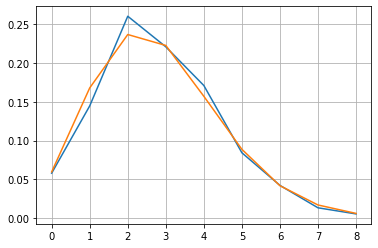

In [13]:
# проверка распределения
g = {}
for i in range(380):
    s = stats.loc[i]['FTHG']+stats.loc[i]['FTAG']
    if s not in g:
        g[s] = 0
    g[s]+=1
q = sorted(g.items(), key=lambda x: x[0])
X = np.zeros(len(q))
Y = np.zeros(len(q))
for i in range(len(q)):
    X[i] = q[i][0]
    Y[i] = q[i][1]/380
plt.plot(X,Y);
plt.grid();
plt.plot(np.linspace(0,8,9), PoissonDistribution(2.8210526315789473, np.linspace(0,8,9)))

In [14]:
goals = np.zeros(380)
for i in range(380):
    goals[i] = stats.loc[i]['FTHG']+stats.loc[i]['FTAG']

In [15]:
print('Выборочное среднее всех голов: ', sample_mean(goals))
print('Выборочная дисперсия всех голов: ', sample_variance(goals, sample_mean(goals)))

Выборочное среднее всех голов:  2.8210526315789473
Выборочная дисперсия всех голов:  2.5574515235457063


In [16]:
def Stats_Per_Team(stats):
    teams = set(stats['HomeTeam'])
    goals_per_team = {}
    for team in teams:
        goals = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype='f8')#забили всего, пропустили всего, забили дома, забили на выезде, пропустили дома, пропустили на выезде
        for i in range(380):
            if stats.loc[i][2] == team:
                goals[0] += stats.loc[i][4]
                goals[1] += stats.loc[i][5]
                goals[2] += stats.loc[i][4]
                goals[4] += stats.loc[i][5]
            if stats.loc[i][3] == team:
                goals[0] += stats.loc[i][5]
                goals[1] += stats.loc[i][4]
                goals[3] += stats.loc[i][5]
                goals[5] += stats.loc[i][4]
        goals_per_team[team] = goals
    new_stats = pd.DataFrame(goals_per_team.values(), 
                         index=goals_per_team.keys(), columns=['TotIn', 'TotOut', 'InHome', 'InAway', 
                                                               'OutHome', 'OutAway', 'WMeanInHome', 'WMeanInAway', 
                                                               'WMeanOutHome', 'WMeanOutAway'])
    mean_in_home = np.sum(new_stats['InHome'])/380
    mean_in_away = np.sum(new_stats['InAway'])/380
    for i in range(20):
        new_stats.iloc[i]['WMeanInHome'] = new_stats.iloc[i]['InHome']/19/mean_in_home
        new_stats.iloc[i]['WMeanInAway'] = new_stats.iloc[i]['InAway']/19/mean_in_away
        new_stats.iloc[i]['WMeanOutHome'] = new_stats.iloc[i]['OutHome']/19/mean_in_away
        new_stats.iloc[i]['WMeanOutAway'] = new_stats.iloc[i]['OutAway']/19/mean_in_home
    return new_stats

new_stats = Stats_Per_Team(stats)
mean_in_home = np.sum(new_stats['InHome'])/380
mean_in_away = np.sum(new_stats['InAway'])/380
new_stats

,TotIn,TotOut,InHome,InAway,OutHome,OutAway,WMeanInHome,WMeanInAway,WMeanOutHome,WMeanOutAway
Man United,65.0,54.0,33.0,32.0,25.0,29.0,1.107383,1.344538,1.050420,0.973154
Leicester,51.0,48.0,24.0,27.0,20.0,28.0,0.805369,1.134454,0.840336,0.939597
Chelsea,63.0,39.0,39.0,24.0,12.0,27.0,1.308725,1.008403,0.504202,0.906040
West Ham,52.0,55.0,32.0,20.0,27.0,28.0,1.073826,0.840336,1.134454,0.939597
Huddersfield,22.0,76.0,10.0,12.0,31.0,45.0,0.335570,0.504202,1.302521,1.510067
Newcastle,42.0,48.0,24.0,18.0,25.0,23.0,0.805369,0.756303,1.050420,0.771812
Southampton,45.0,65.0,27.0,18.0,30.0,35.0,0.906040,0.756303,1.260504,1.174497
Tottenham,67.0,39.0,34.0,33.0,16.0,23.0,1.140940,1.386555,0.672269,0.771812
Bournemouth,56.0,70.0,30.0,26.0,25.0,45.0,1.006711,1.092437,1.050420,1.510067
Burnley,45.0,68.0,24.0,21.0,32.0,36.0,0.805369,0.882353,1.344538,1.208054


In [17]:
fb_report_table = new_stats.copy()
fb_report_table['WMeanInHome'] = np.around(fb_report_table['WMeanInHome'], decimals=5)
fb_report_table['WMeanInAway'] = np.around(fb_report_table['WMeanInAway'], decimals=5)
fb_report_table['WMeanOutHome'] = np.around(fb_report_table['WMeanOutHome'], decimals=5)
fb_report_table['WMeanOutAway'] = np.around(fb_report_table['WMeanOutAway'], decimals=5)
fb_report_table.to_csv('football_table.csv')

In [18]:
def match(team_1, team_2):
    k = 8
    lam_1 = PoissonDistribution(new_stats.loc[team_1]['WMeanInHome']*new_stats.loc[team_2]['WMeanOutAway']*mean_in_home, np.linspace(0,k,k+1))
    lam_2 = PoissonDistribution(new_stats.loc[team_2]['WMeanInAway']*new_stats.loc[team_1]['WMeanOutHome']*mean_in_away, np.linspace(0,k,k+1))
    d1 = {}
    d2 = {}
    for i in range(k):
        d1[i] = lam_1[i]
        d2[i] = lam_2[i]
    df = pd.DataFrame({team_1:d1, team_2:d2})
    return df

In [19]:
final_score = match(Home_Team, Away_Team)
final_score

,Watford,West Ham
0,0.276439,0.289850
1,0.355436,0.358948
2,0.228503,0.222259
3,0.097934,0.091748
4,0.031480,0.028405
5,0.008095,0.007035
6,0.001735,0.001452
7,0.000319,0.000257


In [20]:
def u_score(prob_score):
    k = 8
    team_1 = prob_score.columns[0]
    team_2 = prob_score.columns[1]
    tab_score = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            tab_score[i][j] = final_score.loc[i][team_1]*final_score.loc[j][team_2]
            tab_score[i][j] = np.around(tab_score[i][j], decimals=10)
    print(team_1,'x',team_2)
    df = pd.DataFrame(tab_score, index=list(range(k)), columns=list(range(k)))
    return df

In [21]:
tab = u_score(final_score)
tab

Watford x West Ham


,0,1,2,3,4,5,6,7
0,0.080126,0.099227,0.061441,0.025363,0.007852,0.001945,4.014078e-04,7.101420e-05
1,0.103023,0.127583,0.078999,0.032610,0.010096,0.002501,5.161160e-04,9.130760e-05
2,0.066232,0.082021,0.050787,0.020965,0.006491,0.001608,3.318019e-04,5.870000e-05
3,0.028386,0.035153,0.021767,0.008985,0.002782,0.000689,1.422064e-04,2.515810e-05
4,0.009124,0.011300,0.006997,0.002888,0.000894,0.000221,4.571100e-05,8.086900e-06
5,0.002346,0.002906,0.001799,0.000743,0.000230,0.000057,1.175470e-05,2.079600e-06
6,0.000503,0.000623,0.000386,0.000159,0.000049,0.000012,2.519000e-06,4.456000e-07
7,0.000092,0.000114,0.000071,0.000029,0.000009,0.000002,4.627000e-07,8.190000e-08


In [22]:
draw = 1/sum(np.diag(tab))
S = 0
for i in range(8):
    for j in range(8):
        if j>i:
            S+=tab[i][j]
team2_win = 1/S
team1_win = 1/(1-S-sum(np.diag(tab)))

In [23]:
bets = np.array([[team1_win, draw, team2_win]])
r_bets = np.array([real_bets])
fin_bets = np.concatenate((bets, r_bets), axis=0)
final_bets = pd.DataFrame(fin_bets, columns=[Home_Team, 'Draw', Away_Team], index=['PredictBets', 'RealBets'])
final_bets

,Watford,Draw,West Ham
PredictBets,2.820077,3.725301,2.652766
RealBets,2.250000,3.750000,3.200000


# Распределение Эрланга
## Выборочные среднее и дисперсия

In [24]:
def random_erlang(k, theta, size=1):
    '''
    This fuction genegates <size> points of Erlang distribution.
    k&theta - are parametrs of Erlang distribution.
    Return value: array with generated points.
    '''
    Erlang_Points = np.zeros(size)
    Exp_Points = np.zeros(k)
    for i in range(size):
        for j in range(k):
            eps = np.random.uniform()
            Exp_Points[j] = -1/theta*np.log(eps)
        S = np.sum(Exp_Points)
        Erlang_Points[i] = S
    Exp_Points = np.sort(Exp_Points)
    return Erlang_Points

import scipy.special as sps
def Erlang_density(m, theta, x): # lambda является зарезервированным словом
    X = np.array([])
    for i in x:
        X = np.append(X, np.array( (theta**m)/(sps.gamma(m)) *(i**(m-1))*np.exp(-theta*i)))
    return X

In [25]:
# создание выборок размера 5 и 10
erlang_data_5 = random_erlang(2, 0.2, 5)
erlang_data_10 = random_erlang(2, 0.2, 10)

#### Вычисление выборочного среднего и выборочной дисперсии собственными функциями

In [26]:
print('Выборочное среднее для выборки {} = {}'.format(erlang_data_5, sample_mean(erlang_data_5)))
print('Выборочное среднее для выборки {} = {}'.format(erlang_data_10, sample_mean(erlang_data_10)))
print('Выборочная дисперсия для выборки {} = {}'.format(erlang_data_5, sample_variance(erlang_data_5, sample_mean(erlang_data_5))))
print('Выборочная дисперсия для выборки {} = {}'.format(erlang_data_10, sample_variance(erlang_data_10, sample_mean(erlang_data_10))))

Выборочное среднее для выборки [ 3.31479771  5.31171986  9.41923371 11.94985237 18.71428869] = 9.741978468914674
Выборочное среднее для выборки [12.1334094  15.11520889 14.31560497 30.73560898 12.54550518 10.54257716
  7.69975526  2.42756889 11.30206613 17.04150249] = 13.385880735563372
Выборочная дисперсия для выборки [ 3.31479771  5.31171986  9.41923371 11.94985237 18.71428869] = 29.283413182039652
Выборочная дисперсия для выборки [12.1334094  15.11520889 14.31560497 30.73560898 12.54550518 10.54257716
  7.69975526  2.42756889 11.30206613 17.04150249] = 48.53497990918514


#### Вычисление выборочного среднего и выборочной дисперсии методами numpy

In [27]:
print('Выборочное среднее для выборки {} = {}'.format(erlang_data_5, np.mean(erlang_data_5)))
print('Выборочное среднее для выборки {} = {}'.format(erlang_data_10, np.mean(erlang_data_10)))
print('Выборочная дисперсия для выборки {} = {}'.format(erlang_data_5, np.var(erlang_data_5)))
print('Выборочная дисперсия для выборки {} = {}'.format(erlang_data_10, np.var(erlang_data_10)))

Выборочное среднее для выборки [ 3.31479771  5.31171986  9.41923371 11.94985237 18.71428869] = 9.741978468914674
Выборочное среднее для выборки [12.1334094  15.11520889 14.31560497 30.73560898 12.54550518 10.54257716
  7.69975526  2.42756889 11.30206613 17.04150249] = 13.385880735563372
Выборочная дисперсия для выборки [ 3.31479771  5.31171986  9.41923371 11.94985237 18.71428869] = 29.283413182039652
Выборочная дисперсия для выборки [12.1334094  15.11520889 14.31560497 30.73560898 12.54550518 10.54257716
  7.69975526  2.42756889 11.30206613 17.04150249] = 48.53497990918514


## Cancer rates

Обработка данных по раку, которые не отсортированы по полам.

In [28]:
file_cancer = open('cancer.txt', 'r')
lines = file_cancer.readlines()
for i in range(len(lines)):
    lines[i] = lines[i].replace('\t', ' ').replace('\n', '').split('"')
    for j in range(len(lines[i])):
        lines[i][j] = lines[i][j].replace('"','')
heads = lines[0]
heads.pop(0)
heads.pop(1)
heads.pop(2)
heads.pop(3)
heads.pop(1)
heads.pop(2)
heads = ['Year', 'Cancer Sites', 'Count', 'Population', 'Crude Rate']
lines.pop(0)
for line in lines:
    line.pop(0)
    line.pop(1)
    line.pop(2)
    line.pop(3)
    line.pop(1)
    line.pop(2)
for i in range(len(lines)):
    th = lines[i][2]
    th = th.split()
    lines[i].pop(2)
    for j in range(3):
        lines[i].append(th[j])
cancer_stats = pd.DataFrame(lines, columns=heads)
cancer_sites = set(cancer_stats['Cancer Sites'])
file_cancer.close()
cancer_stats.head(20)

,Year,Cancer Sites,Count,Population,Crude Rate
0,1999,All Invasive Cancer Sites Combined,1238511,260170608,476.04
1,1999,Oral Cavity and Pharynx,27753,260170608,10.67
2,1999,Lip,2457,260170608,0.94
3,1999,Tongue,6708,260170608,2.58
4,1999,Salivary Gland,3010,260170608,1.16
5,1999,Floor of Mouth,2097,260170608,0.81
6,1999,Gum and Other Mouth,4394,260170608,1.69
7,1999,Nasopharynx,1485,260170608,0.57
8,1999,Tonsil,3437,260170608,1.32
9,1999,Oropharynx,1008,260170608,0.39


#### 104 вида рака и 14 возврастных групп

In [53]:
file_cancer_by_sex = open('cancer_by_sex.txt', 'r')
c_b_s = file_cancer_by_sex.readlines()
for i in range(len(c_b_s)):
    c_b_s[i] = c_b_s[i].replace('\t', ' ').replace('\n', '').split('"')
    for j in range(len(c_b_s[i])):
        c_b_s[i][j] = c_b_s[i][j].replace('"','')
heads2 = c_b_s.pop(0)
heads2.pop(0)
heads2.pop(1)
heads2.pop(2)
heads2.pop(3)
heads2.pop(4)
heads2.pop(5)
heads2.pop(1)
heads2.pop(2)
heads2.pop(3)
heads2[3] = heads2[3].replace(' ','')
for line in c_b_s:
    line.pop(0)
    line.pop(1)
    line.pop(2)
    line.pop(3)
    line.pop(4)
    line.pop(5)
    line.pop(1)
    line.pop(2)
    line.pop(3)
for line in c_b_s:
    line[3] = int(line[3])

In [56]:
t_c_f = c_b_s[0:19]
total_cancer_female = pd.DataFrame(t_c_f, columns=heads2, index=range(1, 20))
total_cancer_female.to_csv('total_cancer_female.csv')
total_cancer_female

,Sex,Cancer Sites,Age Group,Count
1,Female,All Invasive Cancer Sites Combined,< 1 year,6620
2,Female,All Invasive Cancer Sites Combined,1-4 years,21708
3,Female,All Invasive Cancer Sites Combined,5-9 years,14840
4,Female,All Invasive Cancer Sites Combined,10-14 years,17964
5,Female,All Invasive Cancer Sites Combined,15-19 years,29577
6,Female,All Invasive Cancer Sites Combined,20-24 years,51307
7,Female,All Invasive Cancer Sites Combined,25-29 years,89907
8,Female,All Invasive Cancer Sites Combined,30-34 years,153644
9,Female,All Invasive Cancer Sites Combined,35-39 years,256177
10,Female,All Invasive Cancer Sites Combined,40-44 years,436685


In [31]:
life_years = np.linspace(0,90, 19)

In [57]:
t_c_m = c_b_s[1596:1615]
total_cancer_male = pd.DataFrame(t_c_m, columns=heads2, index=range(1,20))
total_cancer_male.to_csv('total_cancer_male.csv')
total_cancer_male

,Sex,Cancer Sites,Age Group,Count
1,Male,All Invasive Cancer Sites Combined,< 1 year,7446
2,Male,All Invasive Cancer Sites Combined,1-4 years,25803
3,Male,All Invasive Cancer Sites Combined,5-9 years,18507
4,Male,All Invasive Cancer Sites Combined,10-14 years,20008
5,Male,All Invasive Cancer Sites Combined,15-19 years,33580
6,Male,All Invasive Cancer Sites Combined,20-24 years,48242
7,Male,All Invasive Cancer Sites Combined,25-29 years,67302
8,Male,All Invasive Cancer Sites Combined,30-34 years,91123
9,Male,All Invasive Cancer Sites Combined,35-39 years,134169
10,Male,All Invasive Cancer Sites Combined,40-44 years,233607


In [33]:
d_c_f = c_b_s[19:1596]
detail_cancer_female = pd.DataFrame(d_c_f, columns=heads2)
detail_cancer_female

,Sex,Cancer Sites,Age Group,Count
0,Female,Oral Cavity and Pharynx,< 1 year,20
1,Female,Oral Cavity and Pharynx,1-4 years,58
2,Female,Oral Cavity and Pharynx,5-9 years,144
3,Female,Oral Cavity and Pharynx,10-14 years,418
4,Female,Oral Cavity and Pharynx,15-19 years,649
...,...,...,...,...
1572,Female,"Female Breast, In Situ",65-69 years,78303
1573,Female,"Female Breast, In Situ",70-74 years,63815
1574,Female,"Female Breast, In Situ",75-79 years,50689
1575,Female,"Female Breast, In Situ",80-84 years,30337


In [58]:
female_pancreas_cancer = []
male_pancreas_cancer = []
for line in c_b_s:
    if line[1]=='Pancreas' and line[0]=='Female':
        female_pancreas_cancer.append(line)
    if line[1]=='Pancreas' and line[0]=='Male':
        male_pancreas_cancer.append(line)
fmale_pancreas = pd.DataFrame(female_pancreas_cancer, columns=['Sex', 'Cancer', 'Age Group', 'Count'], index=range(3, 20))
fmale_pancreas.to_csv('fmale_pancreas.csv')
male_pancreas = pd.DataFrame(male_pancreas_cancer, columns=['Sex', 'Cancer', 'Age Group', 'Count'], index=range(4, 20))
male_pancreas.to_csv('male_pancreas.csv')

In [35]:
d_c_m = c_b_s[1615:3158]
detail_cancer_male = pd.DataFrame(d_c_m, columns=heads2)

In [36]:
years = total_cancer_female['Age Group']
t_c = np.zeros((19, 3), dtype=object)
for i in range(19):
    t_c[i][0] = 'Both Sexes'
    t_c[i][1] = years[i]
    t_c[i][2] = total_cancer_female.iloc[i]['Count'] + total_cancer_male.iloc[i]['Count']
total_cancer = pd.DataFrame(t_c, columns=['Sex', 'Age Group', 'Count'])
total_cancer

,Sex,Age Group,Count
0,Both Sexes,< 1 year,14066
1,Both Sexes,1-4 years,47511
2,Both Sexes,5-9 years,33347
3,Both Sexes,10-14 years,37972
4,Both Sexes,15-19 years,63157
5,Both Sexes,20-24 years,99549
6,Both Sexes,25-29 years,157209
7,Both Sexes,30-34 years,244767
8,Both Sexes,35-39 years,390346
9,Both Sexes,40-44 years,670292


In [37]:
people = 0
for i in range(19):
    people += t_c[i][2]
cancer_count = np.zeros(19)
for i in range(19):
    cancer_count[i] = t_c[i][2]/100000

In [38]:
l = 114*19/people

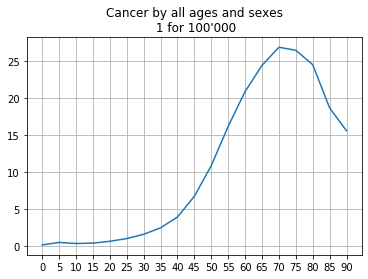

In [39]:
plt.plot(life_years, cancer_count);

plt.xticks(life_years);
plt.grid();
plt.title("Cancer by all ages and sexes\n 1 for 100'000");

In [40]:
female_pancreas_cancer

[['Female', 'Pancreas', '5-9 years', 17],
 ['Female', 'Pancreas', '10-14 years', 38],
 ['Female', 'Pancreas', '15-19 years', 92],
 ['Female', 'Pancreas', '20-24 years', 185],
 ['Female', 'Pancreas', '25-29 years', 345],
 ['Female', 'Pancreas', '30-34 years', 636],
 ['Female', 'Pancreas', '35-39 years', 1453],
 ['Female', 'Pancreas', '40-44 years', 3448],
 ['Female', 'Pancreas', '45-49 years', 7050],
 ['Female', 'Pancreas', '50-54 years', 12311],
 ['Female', 'Pancreas', '55-59 years', 18467],
 ['Female', 'Pancreas', '60-64 years ', 24257],
 ['Female', 'Pancreas', '65-69 years', 29196],
 ['Female', 'Pancreas', '70-74 years', 35149],
 ['Female', 'Pancreas', '75-79 years', 39120],
 ['Female', 'Pancreas', '80-84 years', 37319],
 ['Female', 'Pancreas', '85+ years', 42498]]

In [41]:
k = 10
f_p_c = np.zeros(17)
m_p_c = np.zeros(16)
b_p_c = np.zeros(17)
for i in range(17):
    f_p_c[i] = female_pancreas_cancer[i][-1]/k
    if i==0:
        b_p_c[i] = female_pancreas_cancer[i][-1]/k
    else:
        b_p_c[i] = (female_pancreas_cancer[i][-1]+male_pancreas_cancer[i-1][-1])/k
for i in range(16):
    m_p_c[i] = male_pancreas_cancer[i][-1]/k
men_life_years = np.linspace(10, 85, 16)
women_life_years = np.linspace(5, 85, 17)

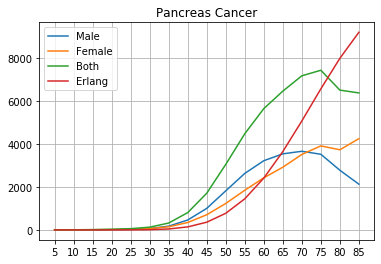

In [42]:
plt.plot(men_life_years, m_p_c, label='Male');
plt.plot(women_life_years, f_p_c, label='Female');
plt.plot(women_life_years, b_p_c, label='Both');
plt.plot(women_life_years, 715600*Erlang_density(15, 0.1415, women_life_years), label='Erlang');
plt.xticks(women_life_years);
plt.grid();
plt.legend();
plt.title('Pancreas Cancer');

## Нахожденение характеристик для 4 выборок данных:
total_cancer_male

total_cancer_female

fmale_pancreas

male_pancreas

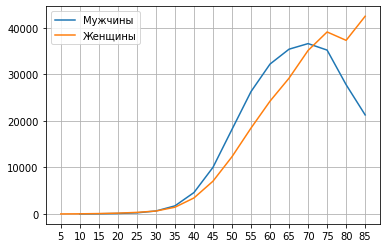

In [119]:
plt.plot(men_life_years, male_pancreas['Count'], label='Мужчины');
plt.plot(women_life_years, fmale_pancreas['Count'], label='Женщины');
plt.grid();
plt.xticks(women_life_years);
plt.legend();
#plt.savefig('Images/pancreas_cancer.pdf');

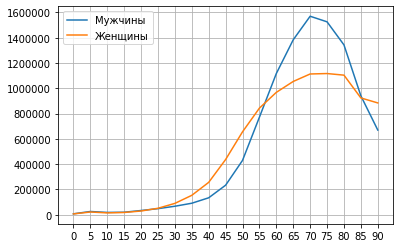

In [44]:
plt.plot(life_years, total_cancer_male['Count'], label='Мужчины');
plt.plot(life_years, total_cancer_female['Count'], label='Женщины');
plt.grid();
plt.xticks(life_years);
plt.legend();
plt.savefig('Images/total_cancer.pdf');

## Специальные функции выборочных моментов

In [102]:
def cancer_mean(cancer_df):
    N = np.sum(cancer_df['Count'])
    S = 0
    for i in range(cancer_df.shape[0]):
        S += cancer_df['Count'].iloc[i]*i
    S = int(np.around(S/N))
    return S

def cancer_var(cancer_df, cancer_mean_value):
    N = np.sum(cancer_df['Count'])
    S = 0
    for i in range(cancer_df.shape[0]):
        S += cancer_df['Count'].iloc[i]*(i-cancer_mean_value)**2
    S = int(np.around(S/N))
    return S

In [103]:
mean_t_c_m = cancer_mean(total_cancer_male)
mean_t_c_f = cancer_mean(total_cancer_female)
mean_male_pancreas = cancer_mean(male_pancreas)
mean_female_pancreas = cancer_mean(fmale_pancreas)
print('Выборочное среднее мужчин, болеющих раком: ',mean_t_c_m)
print('Выборочное среднее женщин, болеющих раком: ',mean_t_c_f)
print('Выборочное среднее мужчин, болеющих раком поджелудочной железы: ',mean_male_pancreas)
print('Выборочное среднее женщин, болеющих раком поджелудочной железы: ',mean_female_pancreas)

Выборочное среднее мужчин, болеющих раком:  14
Выборочное среднее женщин, болеющих раком:  13
Выборочное среднее мужчин, болеющих раком поджелудочной железы:  11
Выборочное среднее женщин, болеющих раком поджелудочной железы:  13


In [104]:
print('Выборочная дисперсия мужчин, болеющих раком: ',cancer_var(total_cancer_male,mean_t_c_m))
print('Выборочная дисперсия женщин, болеющих раком: ',cancer_var(total_cancer_female,mean_t_c_f))
print('Выборочная дисперсия мужчин, болеющих раком поджелудочной железы: ',cancer_var(male_pancreas, mean_male_pancreas))
print('Выборочная дисперсия женщин, болеющих раком поджелудочной железы: ',cancer_var(fmale_pancreas, mean_female_pancreas))

Выборочная дисперсия мужчин, болеющих раком:  8
Выборочная дисперсия женщин, болеющих раком:  10
Выборочная дисперсия мужчин, болеющих раком поджелудочной железы:  6
Выборочная дисперсия женщин, болеющих раком поджелудочной железы:  6


### Нахождение значений оценкой

In [107]:
lam_male_tot = np.around(116/mean_t_c_m, decimals=5)
print(lam_male_tot)
lam_fmale_tot = np.around(116/mean_t_c_f, decimals=5)
print(lam_fmale_tot)
lam_panc_male = np.around(15/mean_male_pancreas, decimals=5)
print(lam_panc_male)
lam_panc_fmale = np.around(15/mean_female_pancreas, decimals=5)
print(lam_panc_fmale)

8.28571
8.92308
1.36364
1.15385
